In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [17]:
resumeDataSet = pd.read_csv('/content/resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [18]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [19]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
Automation Testing            7
DevOps Engineer               7
Testing                       7
DotNet Developer              7
Hadoop                        7
SAP Developer                 6
Python Developer              6
Health and fitness            6
Civil Engineer                6
Arts                          6
Business Analyst              6
Web Designing                 5
Mechanical Engineer           5
Sales                         5
ETL Developer                 5
Electrical Engineering        5
Blockchain                    5
Network Security Engineer     5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


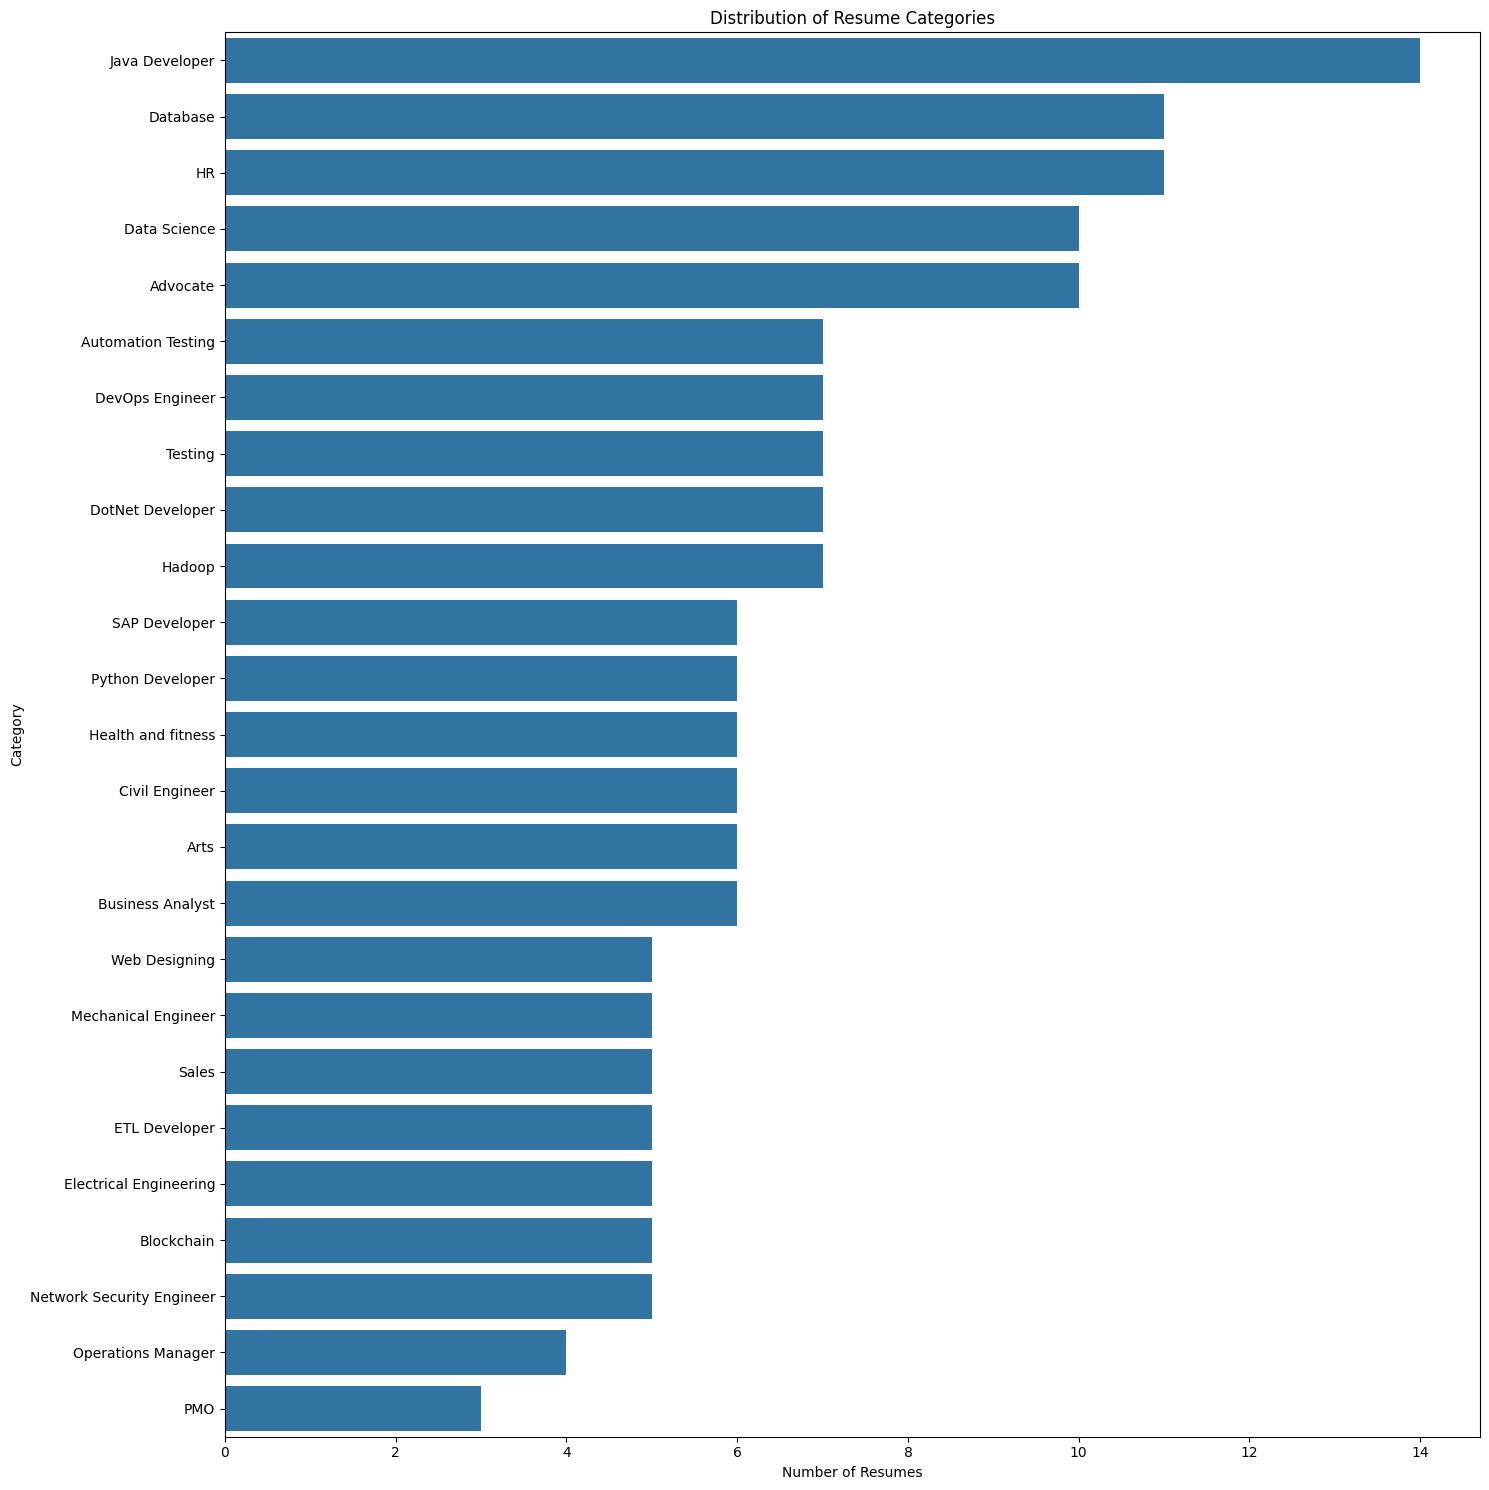

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
plt.yticks(rotation=0)  # y-axis labels should remain horizontal for readability
sns.countplot(y="Category", data=resumeDataSet, order=resumeDataSet['Category'].value_counts().index)
plt.title("Distribution of Resume Categories")
plt.xlabel("Number of Resumes")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

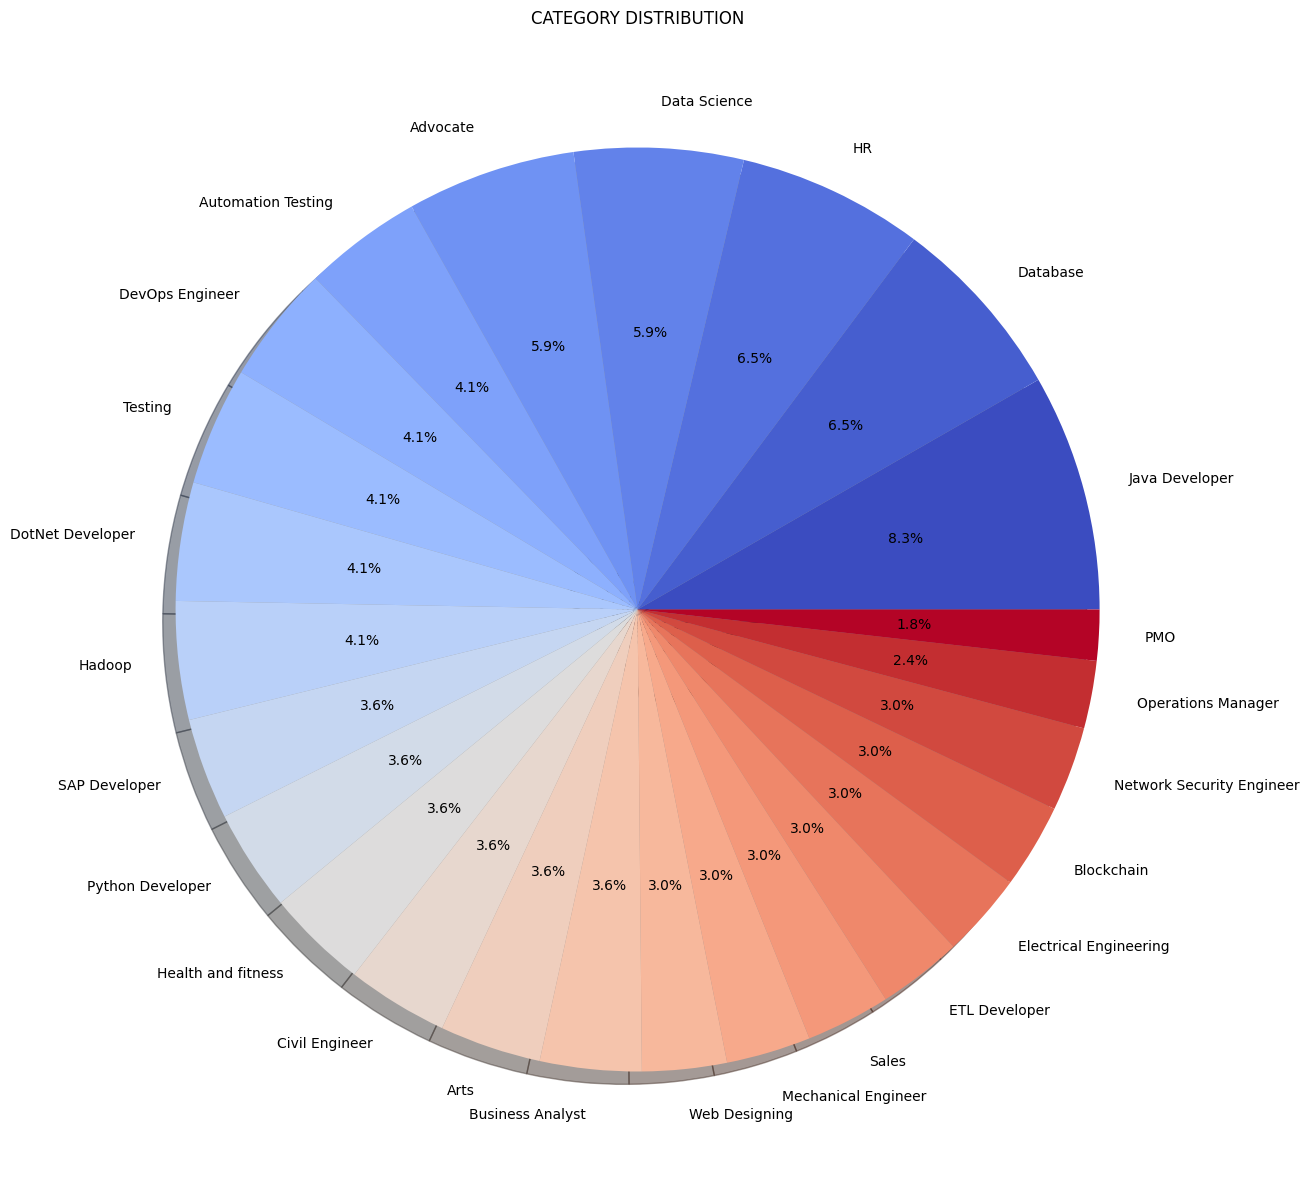

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Count and labels, ensuring they are aligned
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels = targetCounts.index

# Set up the figure
plt.figure(1, figsize=(15, 15))
the_grid = GridSpec(1, 1)

# Dynamically generate enough colors
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, len(targetCounts))]

# Create the pie chart
plt.subplot(the_grid[0], aspect=1)
plt.title('CATEGORY DISTRIBUTION')
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)

plt.show()


In [22]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('exprience', 601), ('company', 571), ('project', 532), ('description', 521), ('months', 509), ('details', 508), ('data', 374), ('1', 345), ('management', 303), ('team', 268), ('database', 265), ('sql', 232), ('year', 230), ('system', 216), ('maharashtra', 215), ('6', 209), ('using', 206), ('less', 204), ('business', 195), ('development', 182), ('server', 182), ('testing', 176), ('january', 174), ('ltd', 174), ('test', 174), ('client', 164), ('skills', 156), ('c', 152), ('application', 152), ('java', 147), ('engineering', 147), ('work', 147), ('pune', 147), ('responsibilities', 144), ('pvt', 143), ('education', 139), ('technical', 136), ('environment', 136), ('software', 129), ('reports', 126), ('india', 126), ('services', 125), ('working', 125), ('like', 123), ('developer', 122), ('monthscompany', 121), ('various', 121), ('requirements', 119), ('design', 114), ('sales', 111)]


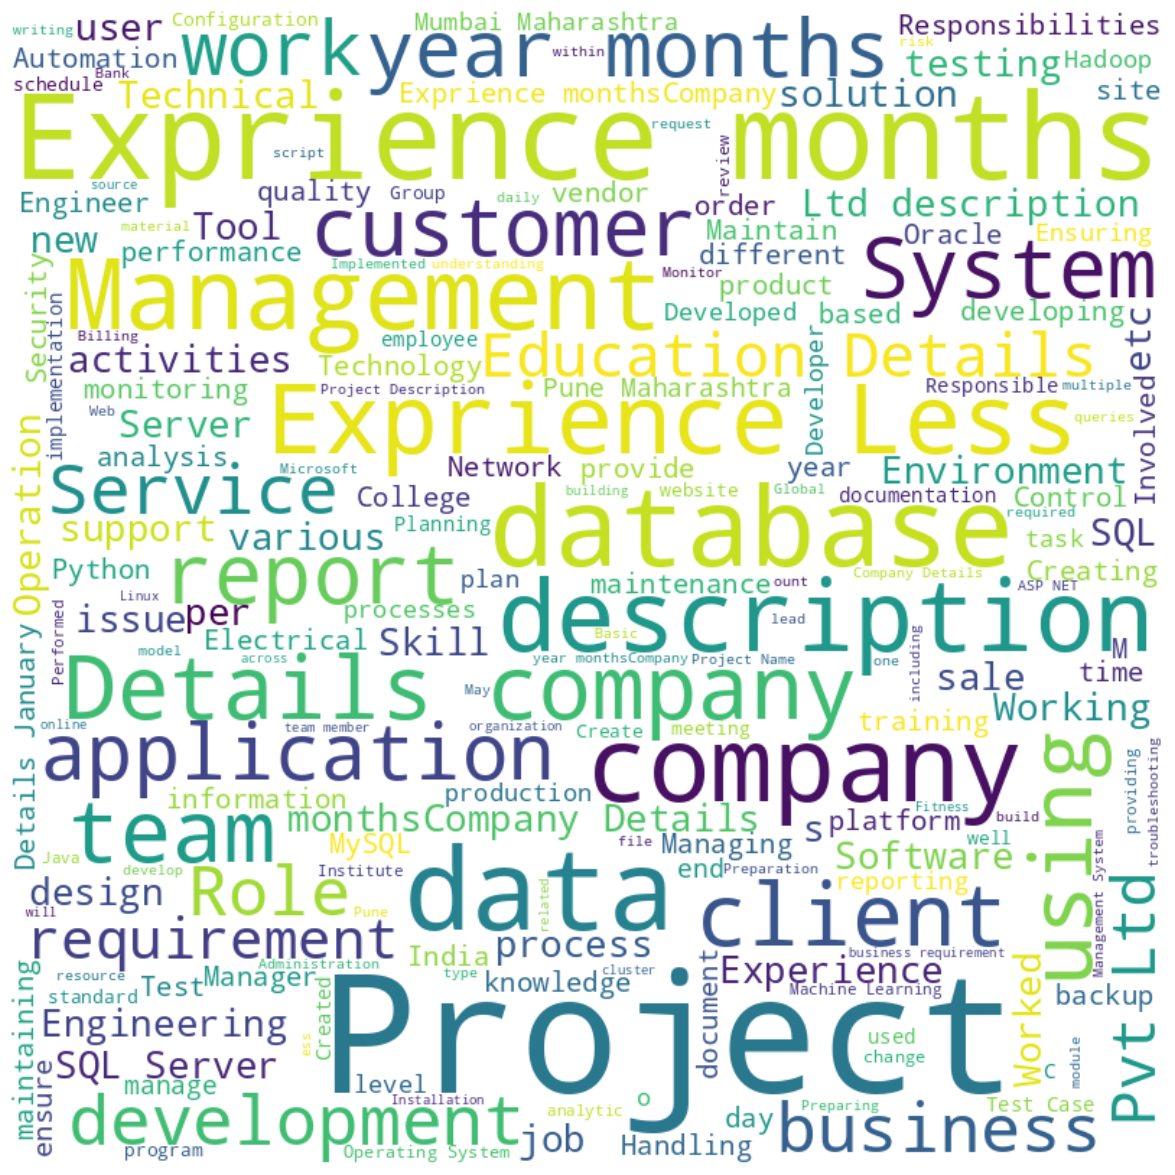

In [24]:
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download required NLTK resources, including punkt_tab
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

# Prepare stopwords and data containers
oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""

# Loop through resumes
for i in range(0, 160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText + " "
    tokens = nltk.word_tokenize(cleanedText)
    for word in tokens:
        if word.lower() not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word.lower())

# Frequency distribution and top words
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

# Generate word cloud
wc = WordCloud(width=800, height=800, background_color='white').generate(cleanedSentences)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


In [26]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.87
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.